In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [77]:
df = pd.read_csv('car data.csv')

In [78]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [79]:
df.shape

(301, 9)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [81]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [82]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [83]:
df.isna().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [84]:
df['years_diff'] = 2025-df['Year']

In [85]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years_diff
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [86]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'years_diff'],
      dtype='object')

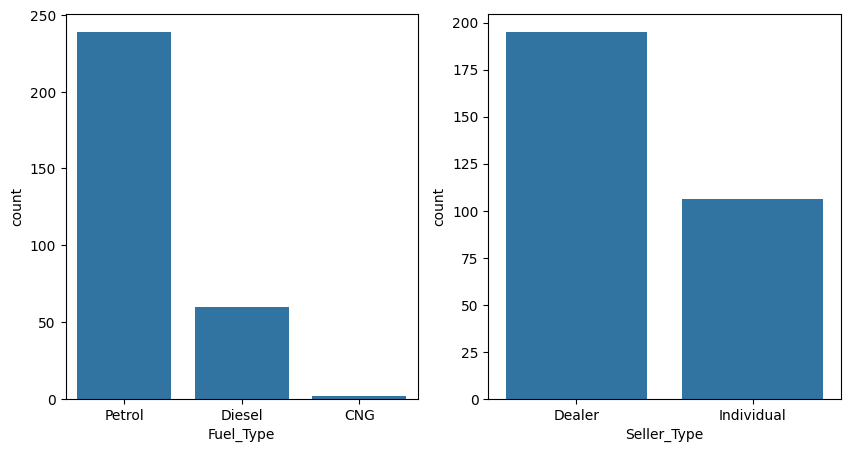

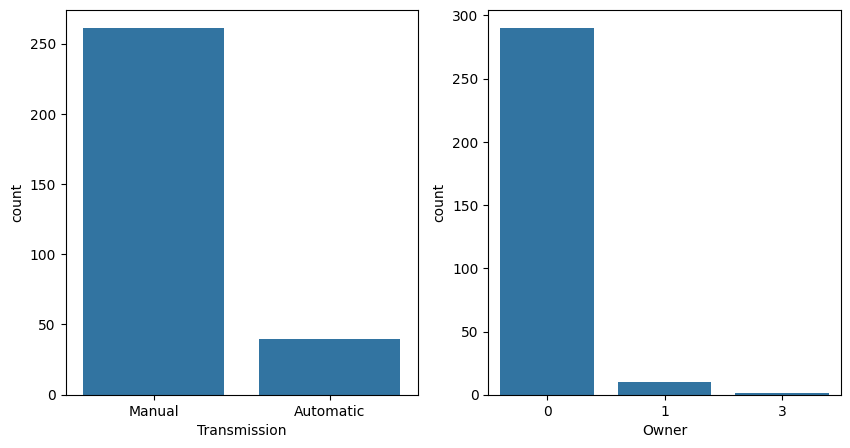

In [87]:
categorical_cols = ['Fuel_Type', 'Seller_Type', 'Transmission','Owner']
i = 0
while i < len(categorical_cols):
  fig = plt.figure(figsize = (10,5))
  plt.subplot(1,2,1)
  sns.countplot(x = categorical_cols[i],data = df)
  i +=1
  plt.subplot(1,2,2)
  sns.countplot(x = categorical_cols[i],data = df)
  i +=1
  plt.show()


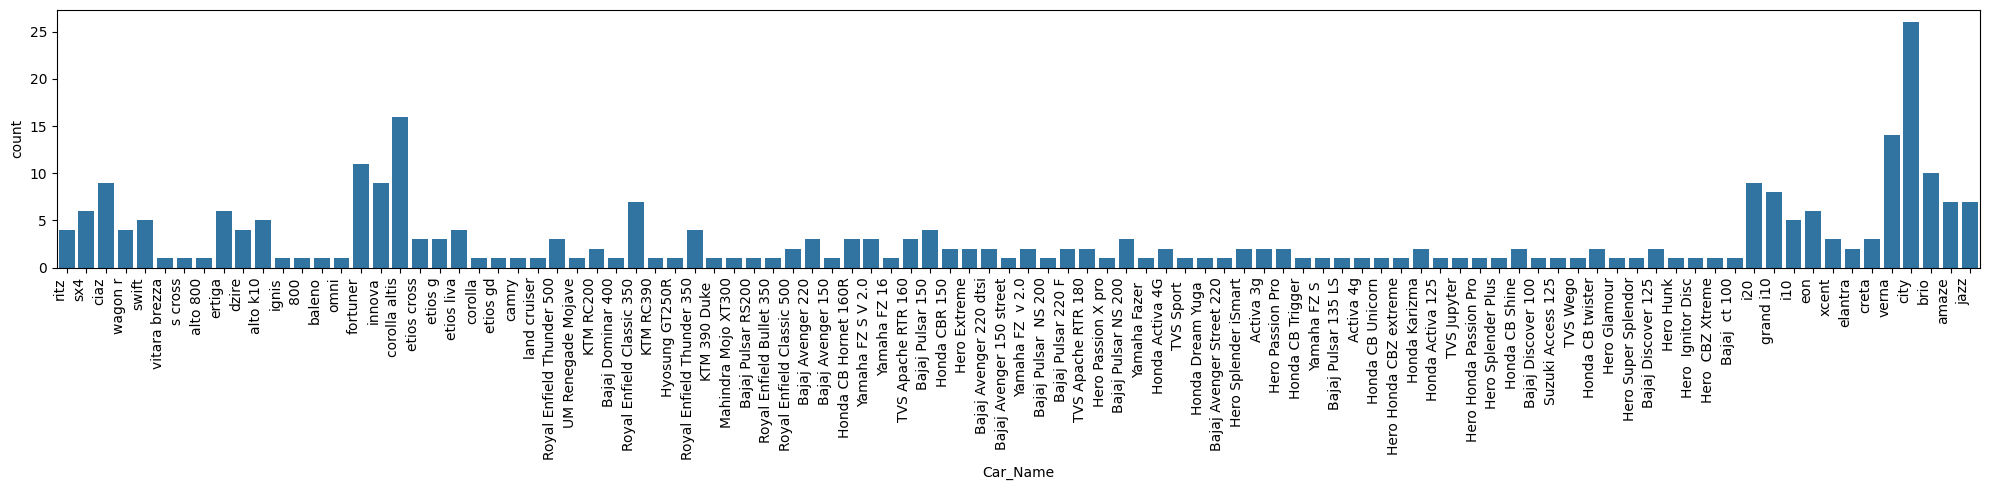

In [88]:
fig = plt.figure(figsize = (20,5))
sns.countplot(x = 'Car_Name',data = df,)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

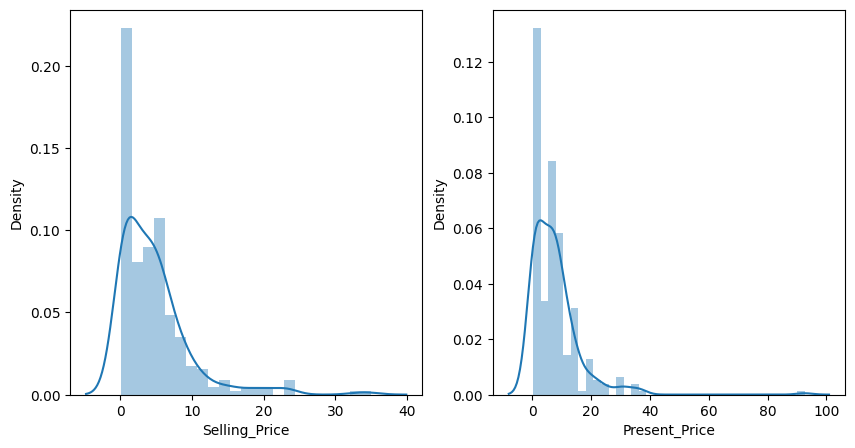

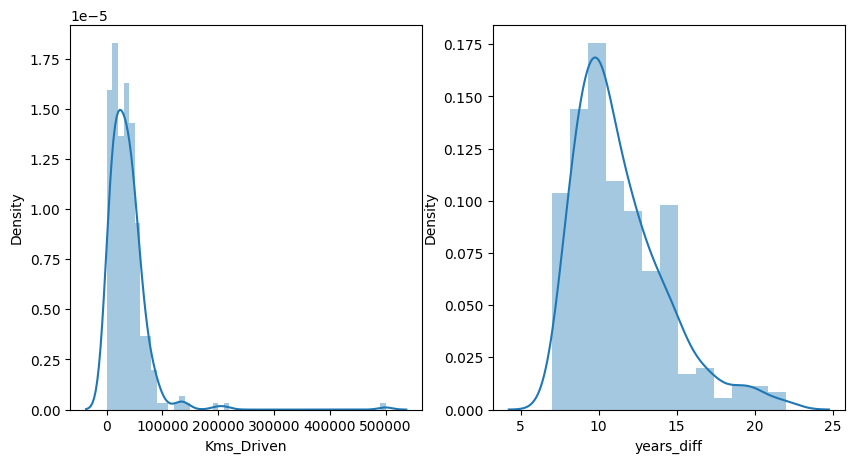

In [89]:
numerical_cols = ['Selling_Price','Present_Price','Kms_Driven','years_diff']
i = 0
while i < len(numerical_cols):
  fig = plt.figure(figsize = (10,5))
  plt.subplot(1,2,1)
  sns.distplot(df[numerical_cols[i]])
  i +=1
  plt.subplot(1,2,2)
  sns.distplot(df[numerical_cols[i]])
  i +=1
  plt.show()

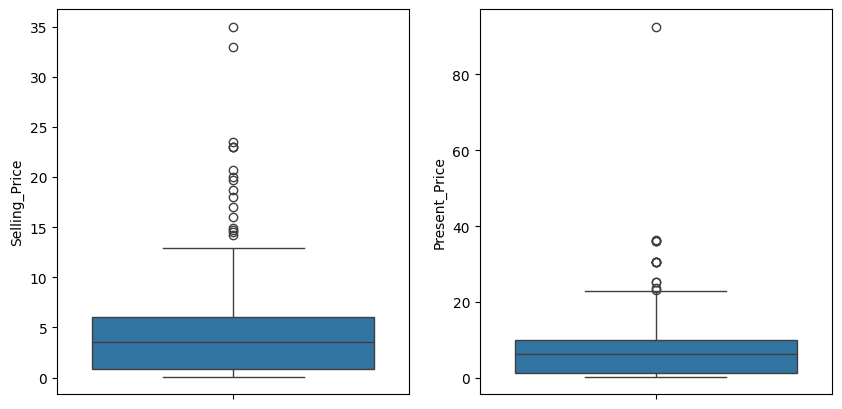

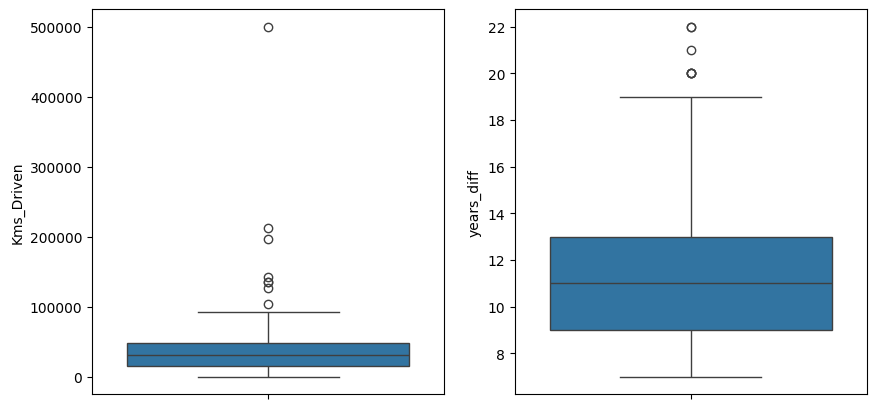

In [90]:
numerical_cols = ['Selling_Price','Present_Price','Kms_Driven','years_diff']
i = 0
while i < len(numerical_cols):
  fig = plt.figure(figsize = (10,5))
  plt.subplot(1,2,1)
  sns.boxplot(df[numerical_cols[i]])
  i +=1
  plt.subplot(1,2,2)
  sns.boxplot(df[numerical_cols[i]])
  i +=1
  plt.show()

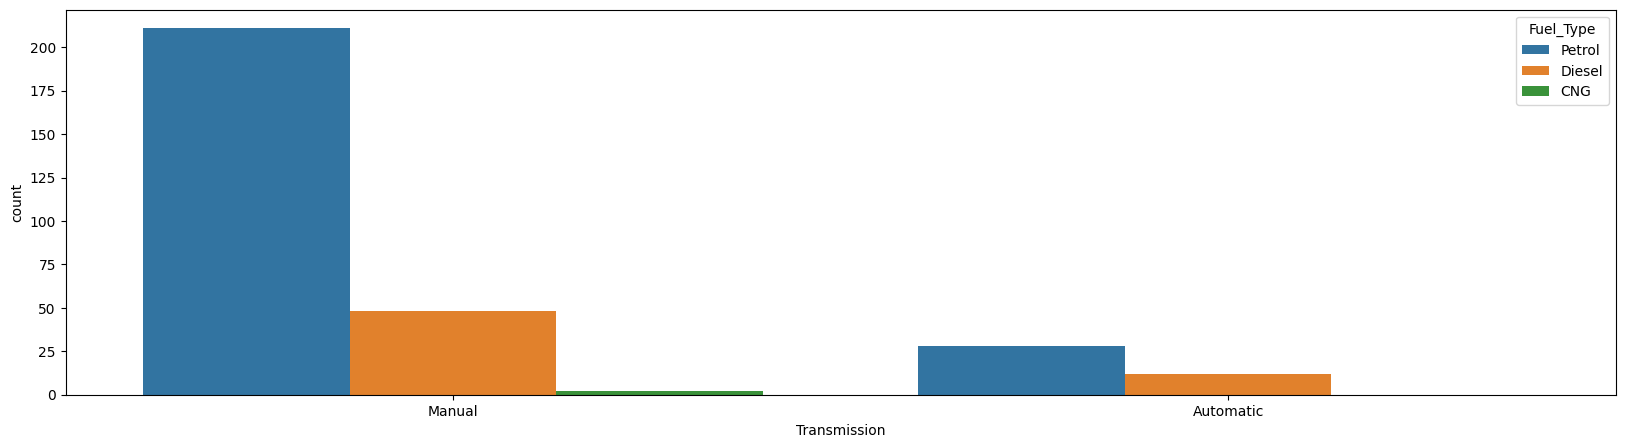

In [91]:
fig = plt.figure(figsize = (20,5))
sns.countplot(x = 'Transmission',data = df, hue = 'Fuel_Type')
plt.show()

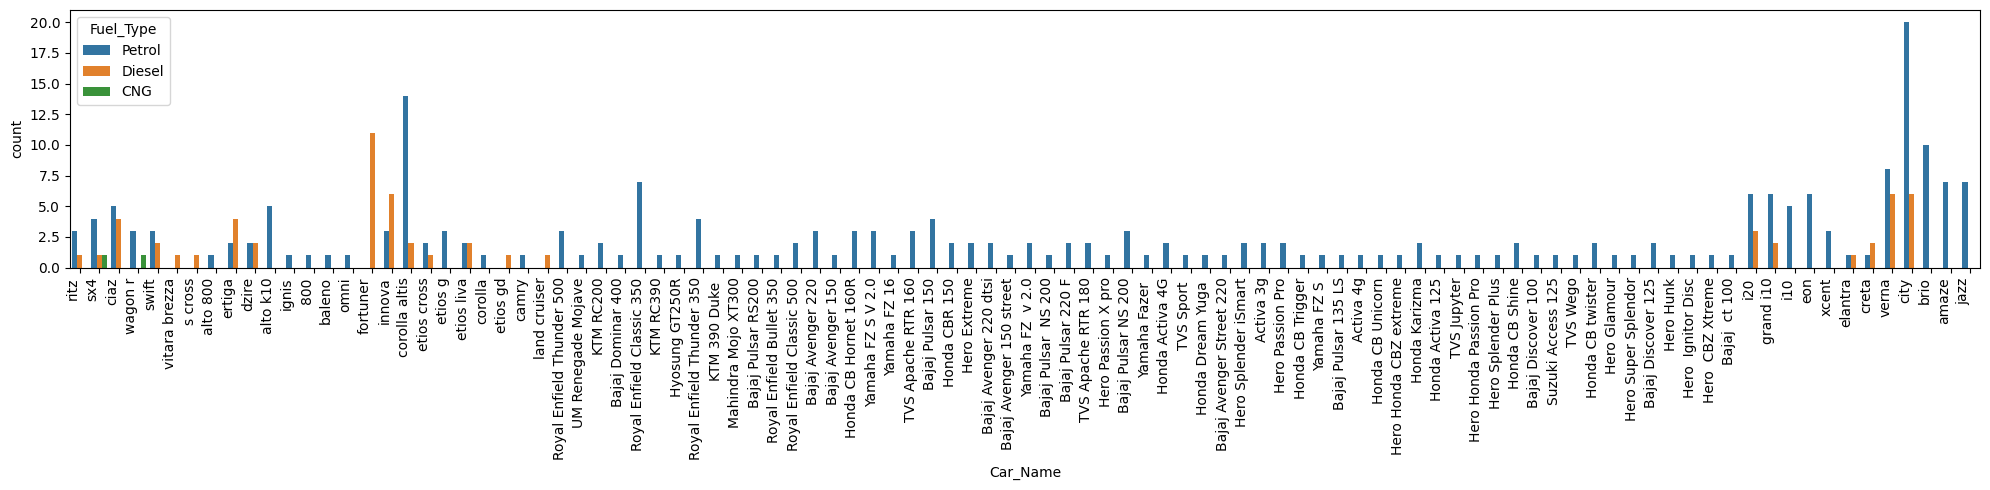

In [92]:
fig = plt.figure(figsize = (20,5))
sns.countplot(x = 'Car_Name',data = df, hue = 'Fuel_Type')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [93]:
df[df['Present_Price']>df['Present_Price'].quantile(0.99)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years_diff
64,fortuner,2017,33.0,36.23,6000,Diesel,Dealer,Automatic,0,8
86,land cruiser,2010,35.0,92.60,78000,Diesel,Dealer,Manual,0,15


In [94]:
df[df['Selling_Price']>df['Selling_Price'].quantile(0.99)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years_diff
63,fortuner,2015,23.5,35.96,47000,Diesel,Dealer,Automatic,0,10
64,fortuner,2017,33.0,36.23,6000,Diesel,Dealer,Automatic,0,8
86,land cruiser,2010,35.0,92.60,78000,Diesel,Dealer,Manual,0,15


In [95]:
df[df['Kms_Driven']>df['Kms_Driven'].quantile(0.99)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years_diff
84,innova,2005,3.49,13.46,197176,Diesel,Dealer,Manual,0,20
179,Honda Karizma,2010,0.31,1.05,213000,Petrol,Individual,Manual,0,15
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0,17


<Axes: >

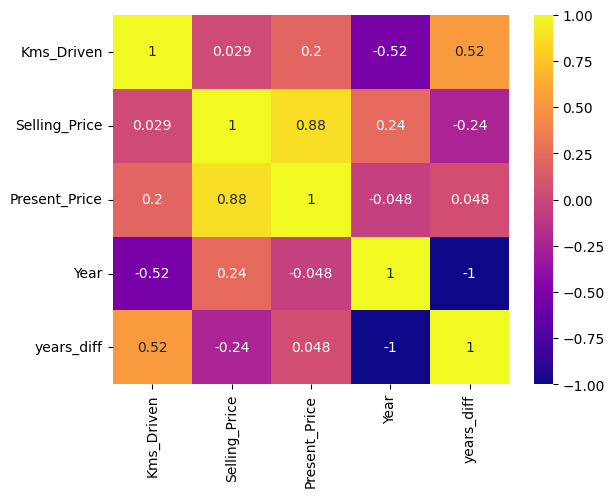

In [96]:
df1 = df[['Kms_Driven','Selling_Price','Present_Price','Year','years_diff']]
sns.heatmap(df1.corr(),annot = True, cmap = 'plasma')

In [97]:
df1.corr()['Selling_Price']

,Selling_Price
Kms_Driven,0.029187
Selling_Price,1.000000
Present_Price,0.878983
Year,0.236141
years_diff,-0.236141


In [98]:
df1.corr()['Present_Price']

,Present_Price
Kms_Driven,0.203647
Selling_Price,0.878983
Present_Price,1.000000
Year,-0.047584
years_diff,0.047584


In [99]:
df1.pivot_table(values='Selling_Price',index='Present_Price',aggfunc='mean')

,Selling_Price
Present_Price,
0.32,0.180000
0.47,0.270000
0.48,0.300000
0.51,0.340000
0.52,0.312500
...,...
25.39,21.875000
30.61,18.280000
35.96,20.746667


In [100]:
df.pivot_table(values='Selling_Price',index='Seller_Type',columns = 'Fuel_Type', aggfunc='mean')

Fuel_Type,CNG,Diesel,Petrol
Seller_Type,,,
Dealer,3.1,10.181525,5.252388
Individual,NaN,16.000000,0.726857


In [101]:
df.pivot_table(values='Present_Price',index='Transmission',aggfunc='mean', columns = 'Fuel_Type')

Fuel_Type,CNG,Diesel,Petrol
Transmission,,,
Automatic,NaN,30.6425,8.746786
Manual,6.415,12.1075,5.163791


In [102]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years_diff
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [103]:
df2 = df[['Year','Selling_Price','Present_Price','Kms_Driven','years_diff','Fuel_Type','Transmission','Owner','Seller_Type']]

In [104]:
df2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,years_diff,Fuel_Type,Transmission,Owner,Seller_Type
0,2014,3.35,5.59,27000,11,Petrol,Manual,0,Dealer
1,2013,4.75,9.54,43000,12,Diesel,Manual,0,Dealer
2,2017,7.25,9.85,6900,8,Petrol,Manual,0,Dealer
3,2011,2.85,4.15,5200,14,Petrol,Manual,0,Dealer
4,2014,4.60,6.87,42450,11,Diesel,Manual,0,Dealer


In [105]:
df2['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [106]:
df2['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [107]:
df2['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [108]:
df2['Owner'].unique()

array([0, 1, 3])

In [109]:
df2 = pd.get_dummies(df2,drop_first=True)

In [110]:
df2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,years_diff,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual
0,2014,3.35,5.59,27000,11,0,False,True,True,False
1,2013,4.75,9.54,43000,12,0,True,False,True,False
2,2017,7.25,9.85,6900,8,0,False,True,True,False
3,2011,2.85,4.15,5200,14,0,False,True,True,False
4,2014,4.60,6.87,42450,11,0,True,False,True,False


In [111]:
# Mapping False and True with 0 and 1 for the entire dataset
df3 = df2[['Fuel_Type_Diesel','Fuel_Type_Petrol','Transmission_Manual','Seller_Type_Individual']]
df3 = df3.applymap(lambda x: 1 if x == True else 0)


In [112]:
df3['Fuel_Type_Diesel'].unique()

array([0, 1])

In [113]:
df3.head()

,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual
0,0,1,1,0
1,1,0,1,0
2,0,1,1,0
3,0,1,1,0
4,1,0,1,0


In [114]:
#Merge df3 and df2
df2 = pd.concat([df2,df3],axis=1)

In [115]:
df2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,years_diff,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual
0,2014,3.35,5.59,27000,11,0,False,True,True,False,0,1,1,0
1,2013,4.75,9.54,43000,12,0,True,False,True,False,1,0,1,0
2,2017,7.25,9.85,6900,8,0,False,True,True,False,0,1,1,0
3,2011,2.85,4.15,5200,14,0,False,True,True,False,0,1,1,0
4,2014,4.60,6.87,42450,11,0,True,False,True,False,1,0,1,0
